In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url = r"D:\edge Downloads\tata NSE dataset\NSE-TATAGLOBAL.csv"
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

D:\users\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 90s 223ms/step - loss: 0.0218
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - loss: 0.0029
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 247ms/step - loss: 0.0027
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - loss: 0.0032
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - loss: 0.0016
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - loss: 0.0017
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step - loss: 0.0018
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - loss: 0.0017
Epoch 16/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - loss: 0.0018
Epoch 17/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - loss: 0.0015
Epoch 18/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - loss: 0.0015
Epoch 19/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - loss: 0.0015
Epoch 20/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - loss: 0.0013
Epoch 21/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - loss: 0.0014
Epoch 22/100
62/62 ━━━━━━

In [11]:
url = r"D:\edge Downloads\tata NSE dataset\tatatest.csv"
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


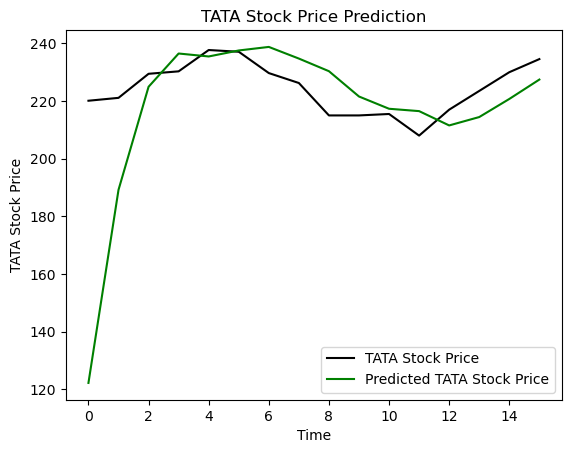

In [14]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()